# Exploratory Data Analysis


## 1. Loading in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/processed/BankChurners_cleaned.csv')

## 2. Data Exploration

### 2.1 Understand Dataset Structure

In [3]:
# Get shape (rows, columns) of the data
shape = df.shape
shape

(10127, 18)

In [4]:
# Brief look at the data
display(df.head(5))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Month_with_bank,No_of_product,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Count,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,1,2,1,39,5,1,12691.0,777,11914.0,1144,42,0.061
1,818770008,1,49,0,5,Graduate,0,4,1,44,6,1,8256.0,864,7392.0,1291,33,0.105
2,713982108,1,51,1,3,Graduate,1,3,1,36,4,1,3418.0,0,3418.0,1887,20,0.000
3,709106358,1,40,1,3,Uneducated,1,2,1,21,5,1,4716.0,0,4716.0,816,28,0.000
4,713061558,1,44,1,2,Graduate,1,1,1,36,3,1,4010.0,1247,2763.0,1088,24,0.311


In [5]:
# View basic information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   Attrition_Flag          10127 non-null  int64  
 2   Customer_Age            10127 non-null  int64  
 3   Gender                  10127 non-null  int64  
 4   Dependent_count         10127 non-null  int64  
 5   Education_Level         10127 non-null  object 
 6   Marital_Status          10127 non-null  int64  
 7   Income_Category         10127 non-null  int64  
 8   Card_Category           10127 non-null  int64  
 9   Month_with_bank         10127 non-null  int64  
 10  No_of_product           10127 non-null  int64  
 11  Months_Inactive_12_mon  10127 non-null  int64  
 12  Credit_Limit            10127 non-null  float64
 13  Total_Revolving_Bal     10127 non-null  int64  
 14  Avg_Open_To_Buy         10127 non-null

### 2.2 Explore Feature Patterns

In [6]:
# Categorise the columns based on df.info()
nominal_categorical = ['Education_Level'] # Categorical (string categories)
ordinal_categorical = ['Attrition_Flag', 'Gender', 'Marital_Status',
                         'Income_Category', 'Card_Category'] # Categorical (numeric categories)

numerical = ['Customer_Age', 'Dependent_count', 'Month_with_bank',
             'No_of_product', 'Months_Inactive_12_mon', 'Credit_Limit',
             'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
             'Total_Trans_Count', 'Avg_Utilization_Ratio']

categorical = nominal_categorical + ordinal_categorical

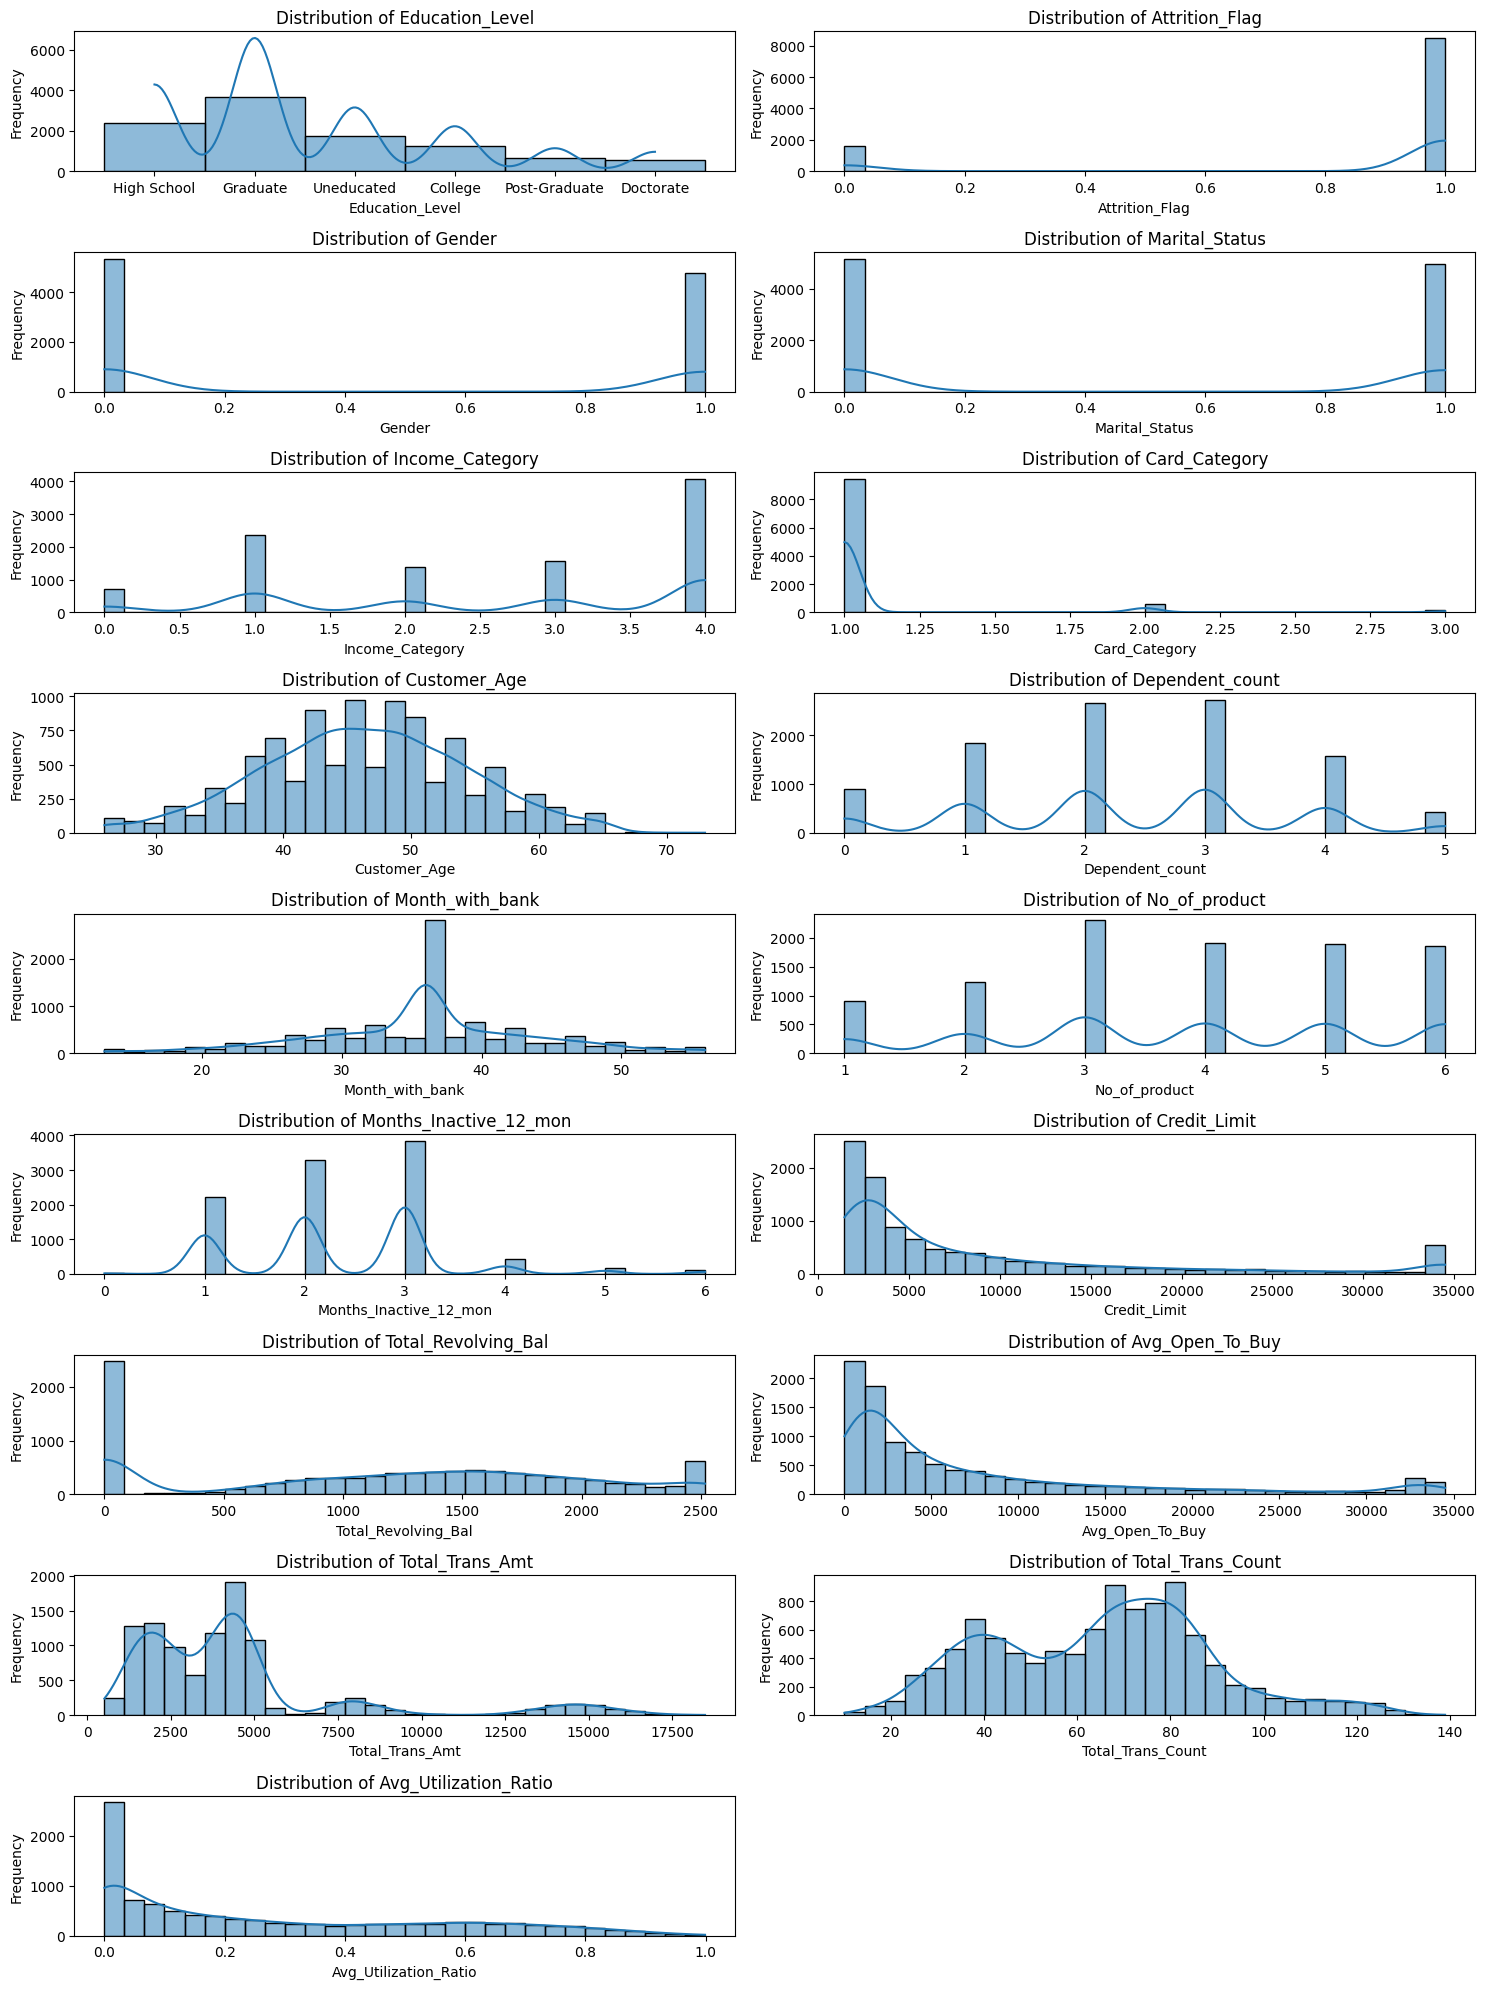

In [7]:
# Explore distributions of all features
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical + numerical):
    plt.subplot(9, 2, i+1)  # Create subplots for each numerical column
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE for better visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2.2.1 Categorical Features

In [8]:
# List all the categories in each categorical feature
for feature in categorical:
    print(feature,  ':', df[feature].unique())

Education_Level : ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Attrition_Flag : [1 0]
Gender : [1 0]
Marital_Status : [1 0]
Income_Category : [2 4 3 1 0]
Card_Category : [1 3 2]


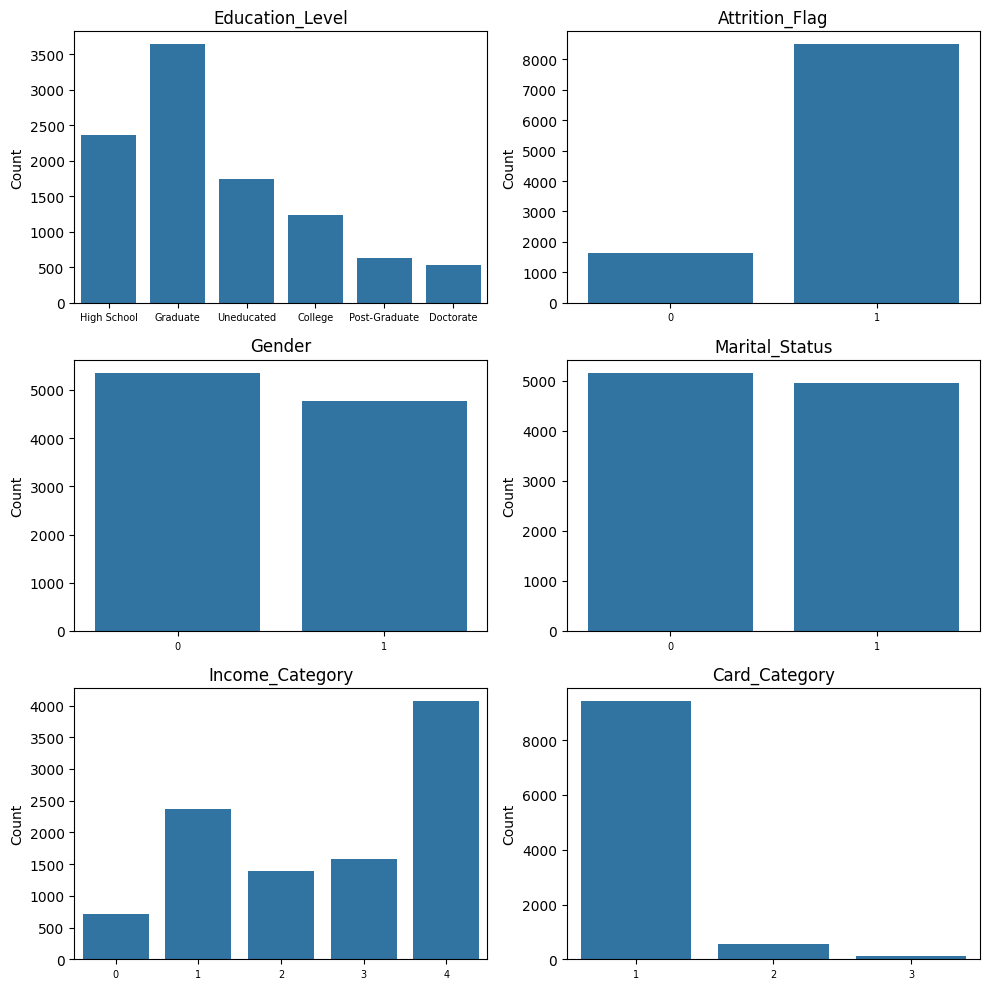

In [9]:
# visualisation for the distributions of categorical features only
plt.figure(figsize=(10, 10))

for i, feature in enumerate(categorical):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(categorical[i])
    plt.xticks(fontsize=7)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

Education_Level
Graduate         0.359238
High School      0.233732
Uneducated       0.171917
College          0.121161
Post-Graduate    0.061815
Doctorate        0.052138
Name: proportion, dtype: float64
Attrition_Flag
1    0.83934
0    0.16066
Name: proportion, dtype: float64
Gender
0    0.529081
1    0.470919
Name: proportion, dtype: float64
Marital_Status
0    0.510023
1    0.489977
Name: proportion, dtype: float64
Income_Category
4    0.402192
1    0.234324
3    0.155327
2    0.136961
0    0.071196
Name: proportion, dtype: float64
Card_Category
1    0.931767
2    0.054804
3    0.013429
Name: proportion, dtype: float64


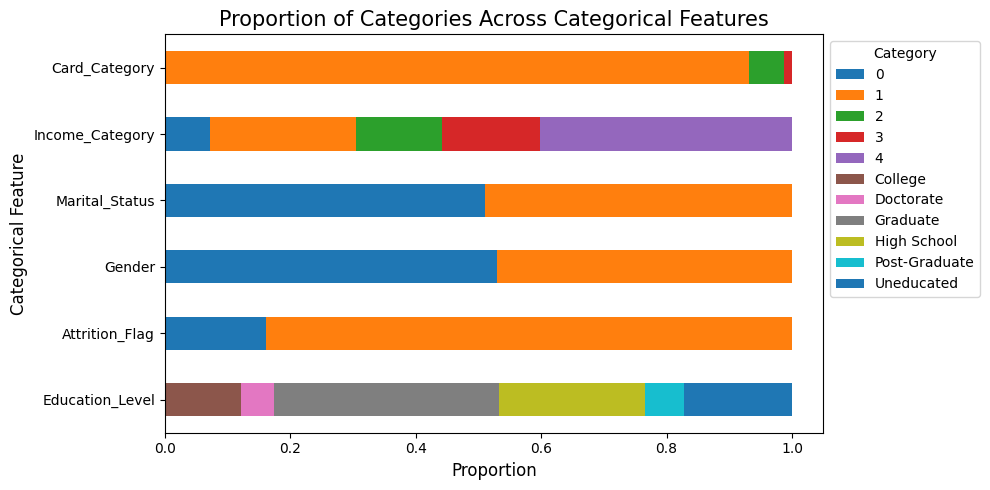

In [10]:
# Display the proportion of each category of the categorical columns
proportions = {}
for feature in categorical:
    proportions[feature] = df[feature].astype(str).value_counts(normalize=True)
    print(proportions[feature])

# Make a new transposed df to prepare for plotting
proportions_df = pd.DataFrame(proportions).transpose()

proportions_df.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.title('Proportion of Categories Across Categorical Features', fontsize=15)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Categorical Feature', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

##### Insights:

1. The categories of `Marital_Status` and `Gender` are evenly distributed.
2. `Card_Category` and `Attrition_Flag` are mostly composed of category 1, which reprensents **"Blue Card"** and **"Existing Customer"** respectively.

In [11]:
# Get churn count
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    1627
1    8500
dtype: int64

#### 2.2.2 Numerical Features

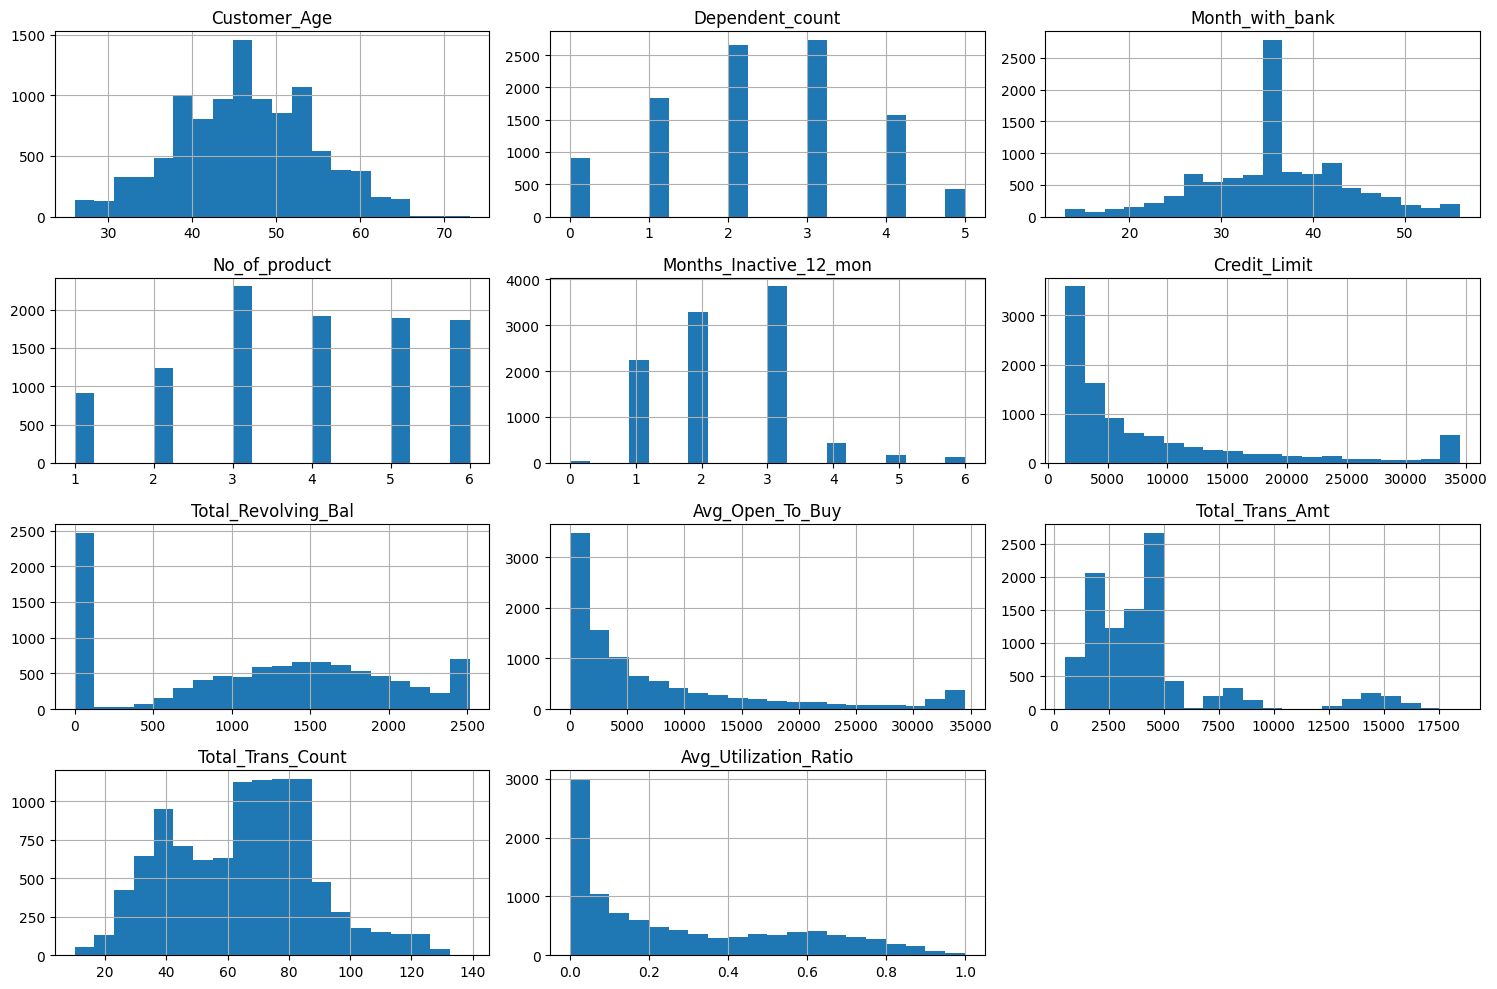

In [12]:
# Visualisation for the distributions of numerical features only
df[numerical].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

##### Insights:

1. `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy` and `Avg_Utilization_Ratio` have a large amount of **zero values**.
2. The distributions of `Month_Inactive_12_mon`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amount` and `Avg_Utilization_Ratio` seem to be **skewed to the left**.
3. The distributions of `Customer_Age`, `Dependent Count`, `Month_with_bank` and `Total_Revolving_Bal`seem to be **symmetrical**.

In [13]:
# Explore the skewness of the distribution of numerical columns
df[numerical].skew()

Customer_Age             -0.033605
Dependent_count          -0.020826
Month_with_bank          -0.106565
No_of_product            -0.162452
Months_Inactive_12_mon    0.633061
Credit_Limit              1.666726
Total_Revolving_Bal      -0.148837
Avg_Open_To_Buy           1.661697
Total_Trans_Amt           2.041003
Total_Trans_Count         0.153673
Avg_Utilization_Ratio     0.718008
dtype: float64

In [14]:
# Explore the skewness of the distribution of numerical columns while exluding zero values
df[numerical][df[numerical] != 0].skew()

Customer_Age             -0.033605
Dependent_count           0.236503
Month_with_bank          -0.106565
No_of_product            -0.162452
Months_Inactive_12_mon    0.663364
Credit_Limit              1.666726
Total_Revolving_Bal       0.051969
Avg_Open_To_Buy           1.661697
Total_Trans_Amt           2.041003
Total_Trans_Count         0.153673
Avg_Utilization_Ratio     0.433588
dtype: float64

##### Insight:

The skewness in `Total_Revolving_Bal` and `Avg_Utilization_Ratio` is heavily affected by the zero values.

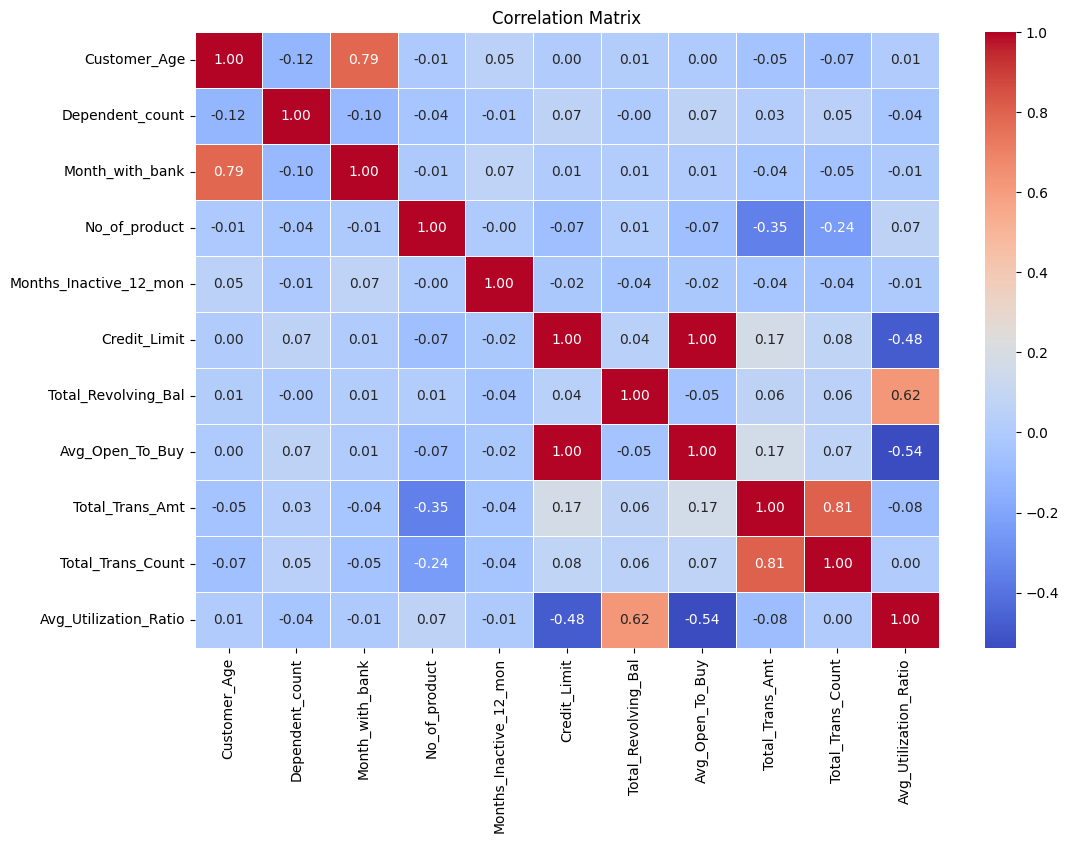

In [ ]:
# Generating a heatmap to visualise correlation between numerical features
numerical_df = df[numerical].copy()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Insight:

There are only very little numerical features having significant correlation between each other.

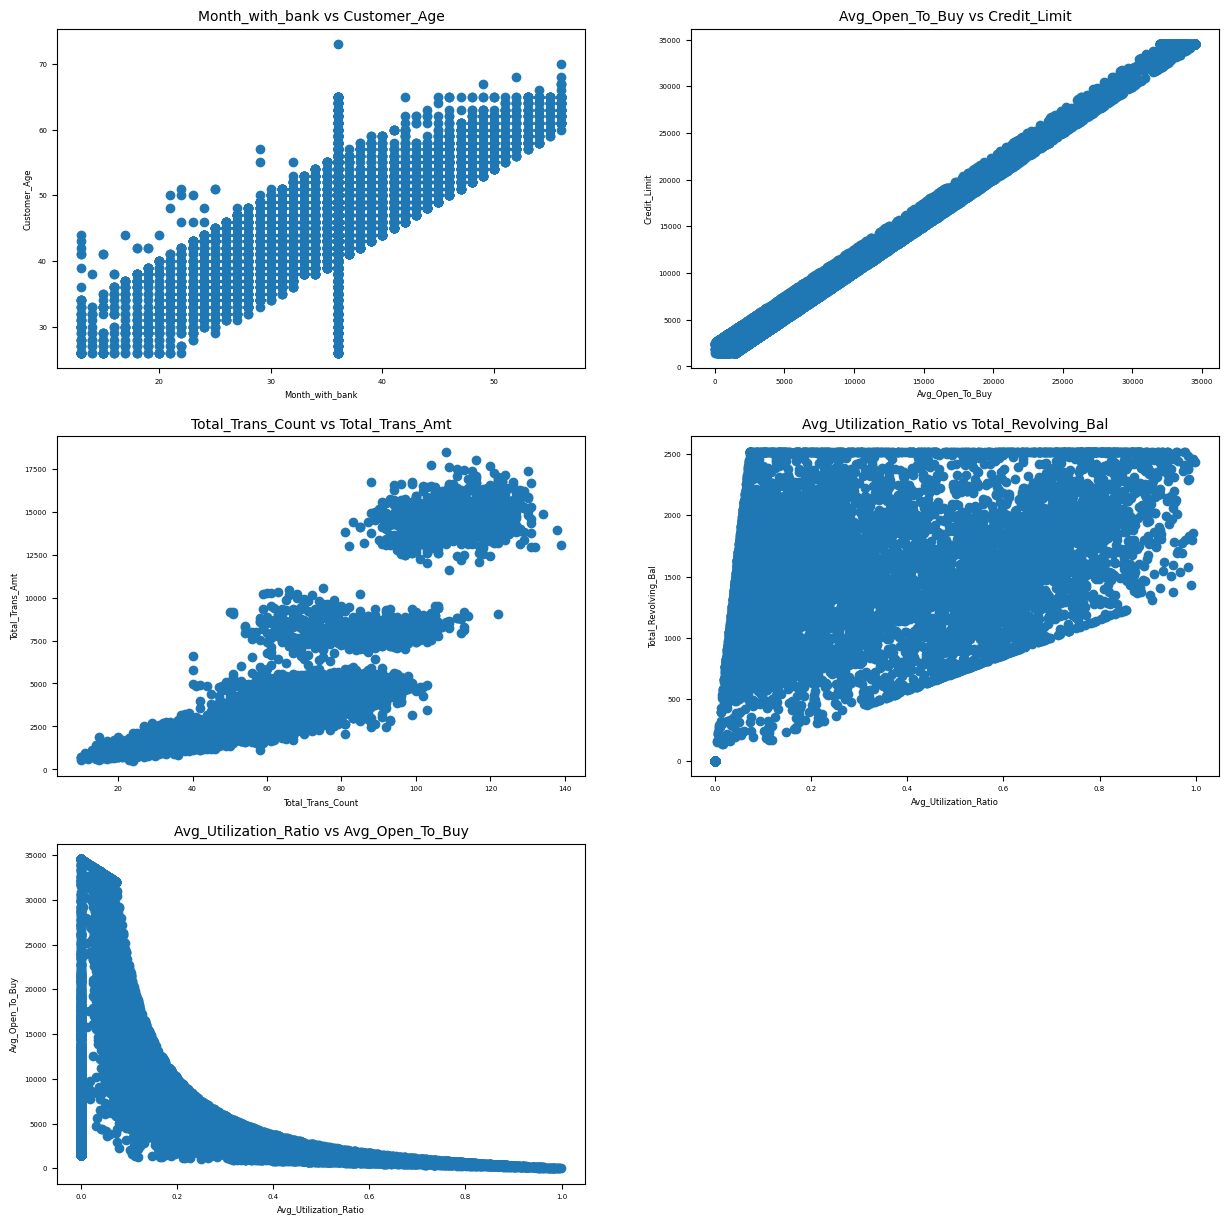

In [15]:
# Scatter plots for correlated numerical features identified in the previous plot
correlated_features = {'Month_with_bank': ['Customer_Age'],
                       'Avg_Open_To_Buy': ['Credit_Limit'],
                       'Total_Trans_Count': ['Total_Trans_Amt'],
                       'Avg_Utilization_Ratio': ['Total_Revolving_Bal',
                                                 'Avg_Open_To_Buy']}

fig, axes = plt.subplots(3, 2, figsize=(15,15))

axes[0,0].scatter(x=df['Month_with_bank'], y=df['Customer_Age'])
axes[0,0].set_title('Month_with_bank vs Customer_Age', fontsize=10)
axes[0,0].set_xlabel('Month_with_bank', fontsize=6)
axes[0,0].set_ylabel('Customer_Age', fontsize=6)
axes[0,0].tick_params(axis='both', labelsize=5)

axes[0,1].scatter(x=df['Avg_Open_To_Buy'], y=df['Credit_Limit'])
axes[0,1].set_title('Avg_Open_To_Buy vs Credit_Limit', fontsize=10)
axes[0,1].set_xlabel('Avg_Open_To_Buy', fontsize=6)
axes[0,1].set_ylabel('Credit_Limit', fontsize=6)
axes[0,1].tick_params(axis='both', labelsize=5)

axes[1,0].scatter(x=df['Total_Trans_Count'], y=df['Total_Trans_Amt'])
axes[1,0].set_title('Total_Trans_Count vs Total_Trans_Amt', fontsize=10)
axes[1,0].set_xlabel('Total_Trans_Count', fontsize=6)
axes[1,0].set_ylabel('Total_Trans_Amt', fontsize=6)
axes[1,0].tick_params(axis='both', labelsize=5)

axes[1,1].scatter(x=df['Avg_Utilization_Ratio'], y=df['Total_Revolving_Bal'])
axes[1,1].set_title('Avg_Utilization_Ratio vs Total_Revolving_Bal', fontsize=10)
axes[1,1].set_xlabel('Avg_Utilization_Ratio', fontsize=6)
axes[1,1].set_ylabel('Total_Revolving_Bal', fontsize=6)
axes[1,1].tick_params(axis='both', labelsize=5)

axes[2,0].scatter(x=df['Avg_Utilization_Ratio'], y=df['Avg_Open_To_Buy'])
axes[2,0].set_title('Avg_Utilization_Ratio vs Avg_Open_To_Buy', fontsize=10)
axes[2,0].set_xlabel('Avg_Utilization_Ratio', fontsize=6)
axes[2,0].set_ylabel('Avg_Open_To_Buy', fontsize=6)
axes[2,0].tick_params(axis='both', labelsize=5)

fig.delaxes(axes[2,1]) # delete the redundant subplot

plt.show()

##### Insights:

1. Strong **linear** relationship between `Month_with_bank` and `Customer_Age` and between `Avg_Open_To_Buy` and `Credit_Limit`
2. Strong **inverse** relationship between `Avg_Utilization_ Ratio` and `Avg_Open_To_Buy`
